This EDA notebook is mostly about feature engineering. As this is a time series problem, the data needs to be stationary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/df.csv')

In [3]:
df.head()

,DATE,GOLDAMGBD228NLBM,GOLDPMGBD228NLBM,GVZCLS,VXGDXCLS,BAMLH0A0HYM2,SP500
0,2011-09-12,1843.000,1834.000,37.20,45.47,7.64,1162.27
1,2011-09-13,1806.000,1820.000,32.49,41.18,7.62,1172.87
2,2011-09-14,1829.000,1818.500,29.83,41.37,7.55,1188.68
3,2011-09-15,1806.000,1782.000,29.46,40.80,7.49,1209.11
4,2011-09-16,1778.000,1794.000,28.86,36.91,7.46,1216.01


In [4]:
df.set_index(keys='DATE', inplace =True)

In [5]:
#https://stackoverflow.com/questions/33961028/remove-non-numeric-rows-in-one-column-with-pandas
df = df[pd.to_numeric(df['GOLDAMGBD228NLBM'], errors='coerce').notnull()] 
df = df[pd.to_numeric(df['GOLDPMGBD228NLBM'], errors='coerce').notnull()] 
df = df[pd.to_numeric(df['GVZCLS'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['VXGDXCLS'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['BAMLH0A0HYM2'], errors='coerce').notnull()] 
df = df[pd.to_numeric(df['SP500'], errors='coerce').notnull()]
df=df.astype(float)

The fed data put a '.' instead of nan, which caused issues.

In [6]:
df['sp500']=df['SP500'].diff()/300

In [7]:
df.dropna(inplace=True)

<AxesSubplot:xlabel='DATE'>

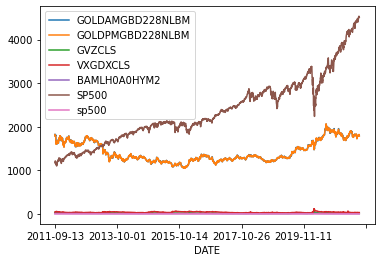

In [8]:
df.plot()

Not yet ready for primetime. SP500 is not stationary. data is not to similar scale.

In [9]:
#inter-day gold swing.
df['gold_swing']=df['GOLDPMGBD228NLBM']/df['GOLDAMGBD228NLBM']

In [10]:
df.gold_swing.describe()

count    2447.000000
mean        0.999756
std         0.005749
min         0.953945
25%         0.997021
50%         0.999837
75%         1.002710
max         1.043366
Name: gold_swing, dtype: float64

In [11]:
df['GOLDPMGBD228NLBM'].describe()
df['GVZCLS'].describe()
df['VXGDXCLS'].describe()

count    2447.000000
mean       36.782072
std        10.517331
min        15.400000
25%        28.670000
50%        34.800000
75%        44.590000
max       118.750000
Name: VXGDXCLS, dtype: float64

In [12]:
df['gold_sc']= df['GOLDPMGBD228NLBM']/df['GOLDPMGBD228NLBM'].max()
df['gold_30']= df['GOLDPMGBD228NLBM'].rolling(30).mean()/df['GOLDPMGBD228NLBM'].max()
df['GVZCLS']= df['GVZCLS']/df['GVZCLS'].max()
df['VXGDXCLS']= df['VXGDXCLS']/df['VXGDXCLS'].max()
df['BAMLH0A0HYM2']= df['BAMLH0A0HYM2']/df['BAMLH0A0HYM2'].max()

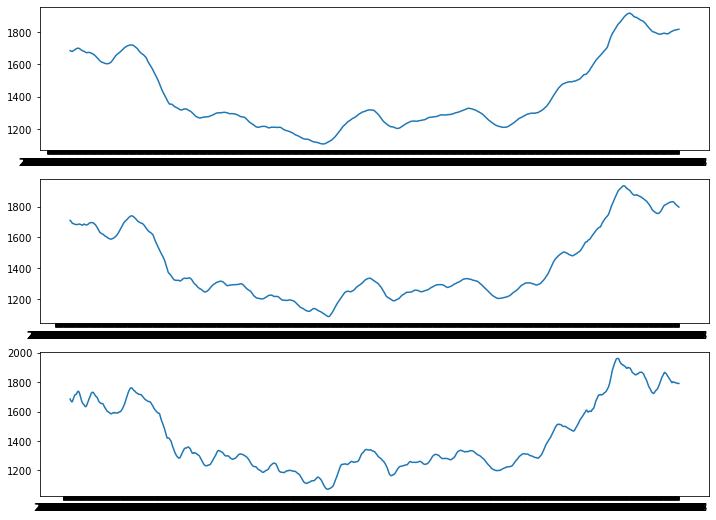

In [13]:
fig, axes = plt.subplots(nrows=3, figsize=(12, 9))
axes[0].plot(df['GOLDPMGBD228NLBM'].rolling(90).mean())
axes[1].plot(df['GOLDPMGBD228NLBM'].rolling(60).mean())
axes[2].plot(df['GOLDPMGBD228NLBM'].rolling(30).mean())

The PM gold price is a potential target. Because the start and end of my series are about equal, I will consider it stationary. I looked at these rolling averages to see relative gitter.

In [14]:
df.drop(['GOLDPMGBD228NLBM','GOLDAMGBD228NLBM','SP500'],axis=1, inplace=True)

<AxesSubplot:xlabel='DATE'>

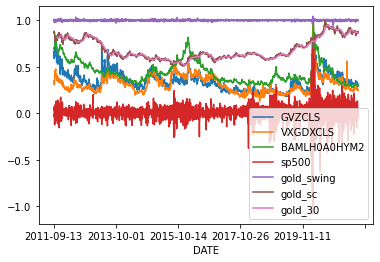

In [15]:
df.plot()

This chart is very promising. There are spikes in uncertainty well before a rise in gold price. The BOA bond spread (BAMLHOAHYM2) looks to be the clearest leading indicator.  The SP 500 scaled diff does not seem like a good indicator. Interday gold swing looks flat. I had considered using it as a target but is so flat it isn't worth my time. This chart also shows how limited my data is. Some of my series haven't existed but 10-12 years. In a market that cycles every 7-10 years, that means I don't show as many full market cycles as I'd like.

In [18]:
df.to_csv('../part-02/data/df2.csv')

Next step is to model. Depending on results, I may look at feature engineering again. I am still considering pulling articles for sentiment analysis. 